In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [7]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [8]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

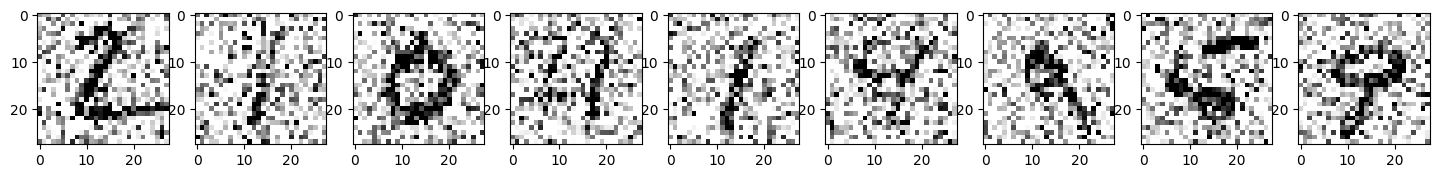

In [9]:
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

In [11]:
model.add(MaxPooling2D((2, 2), padding='same'))


In [12]:
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 8)           0

In [15]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True,
          validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 110s 449ms/step - loss: 0.0515 - val_loss: 0.0390
Epoch 2/10
235/235 [==============================] - 94s 401ms/step - loss: 0.0356 - val_loss: 0.0331
Epoch 3/10
235/235 [==============================] - 94s 398ms/step - loss: 0.0313 - val_loss: 0.0296
Epoch 4/10
235/235 [==============================] - 93s 395ms/step - loss: 0.0291 - val_loss: 0.0278
Epoch 5/10
235/235 [==============================] - 92s 392ms/step - loss: 0.0276 - val_loss: 0.0267
Epoch 6/10
235/235 [==============================] - 94s 398ms/step - loss: 0.0266 - val_loss: 0.0256
Epoch 7/10
235/235 [==============================] - 102s 432ms/step - loss: 0.0257 - val_loss: 0.0248
Epoch 8/10
235/235 [==============================] - 92s 390ms/step - loss: 0.0249 - val_loss: 0.0246
Epoch 9/10
235/235 [==============================] - 96s 410ms/step - loss: 0.0243 - val_loss: 0.0236
Epoch 10/10
235/235 [==============================] - 93s 397ms/step -

In [16]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0232


0.02321116253733635

In [17]:
model.save('denoising_autoencoder.model')


In [18]:
no_noise_img = model.predict(x_test_noisy)


313/313 [==============================] - 4s 13ms/step


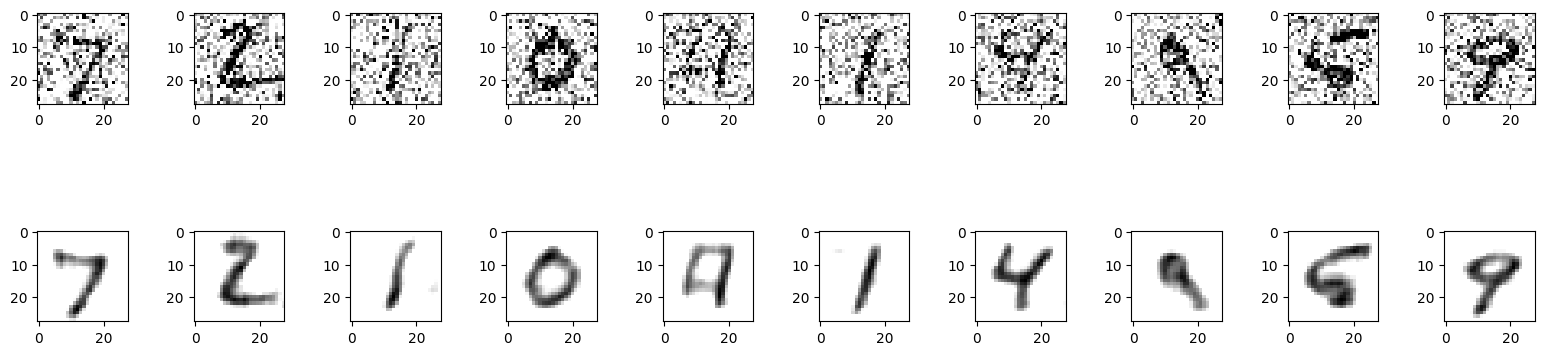

In [19]:
plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")

    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()